[*********************100%%**********************]  1 of 1 completed


Epoch 1/50
55/55 [==============================] - 10s 93ms/step - loss: 0.0153
Epoch 2/50
55/55 [==============================] - 6s 112ms/step - loss: 5.9091e-04
Epoch 3/50
55/55 [==============================] - 9s 172ms/step - loss: 5.5063e-04
Epoch 4/50
55/55 [==============================] - 8s 148ms/step - loss: 5.4568e-04
Epoch 5/50
55/55 [==============================] - 9s 170ms/step - loss: 5.3150e-04
Epoch 6/50
55/55 [==============================] - 5s 83ms/step - loss: 4.8638e-04
Epoch 7/50
55/55 [==============================] - 5s 95ms/step - loss: 4.7502e-04
Epoch 8/50
55/55 [==============================] - 4s 78ms/step - loss: 4.4791e-04
Epoch 9/50
55/55 [==============================] - 5s 87ms/step - loss: 4.3891e-04
Epoch 10/50
55/55 [==============================] - 5s 83ms/step - loss: 4.0833e-04
Epoch 11/50
55/55 [==============================] - 4s 77ms/step - loss: 4.0674e-04
Epoch 12/50
55/55 [==============================] - 5s 98ms/step - loss:

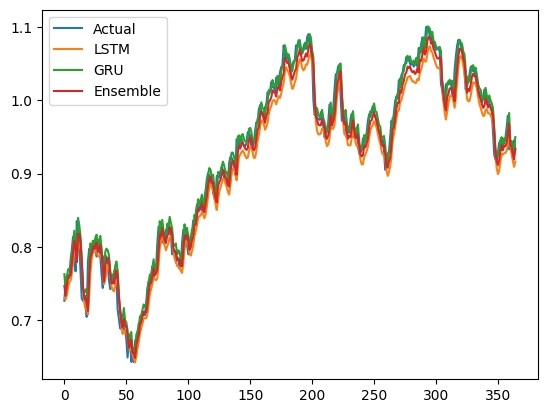

In [ ]:

import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, GRU, Dense
from sklearn.metrics import mean_squared_error

# Get the data for AAPL stock
ticker = "AAPL"
data = yf.download(ticker, start="2015-01-01", end="2024-04-01")

# Preprocess the data
data = data.reset_index()
data = data[['Date', 'Close']]
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Split the data into training and testing sets
train_size = int(len(data) * 0.8)
train_data = data[:train_size]
test_data = data[train_size:]

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)

def create_dataset(dataset, look_back=1):
  X, y = [], []
  for i in range(len(dataset) - look_back):
    X.append(dataset[i:(i + look_back), 0])
    y.append(dataset[i + look_back, 0])
  return np.array(X), np.array(y)

# Reshape the data for LSTM and GRU models
X_train, y_train = create_dataset(train_data, look_back=100)
X_test, y_test = create_dataset(test_data, look_back=100)

# Create the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(units=1))

# Create the GRU model
gru_model = Sequential()
gru_model.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
gru_model.add(GRU(units=50))
gru_model.add(Dense(units=1))

# Compile and train the models
lstm_model.compile(optimizer='adam', loss='mean_squared_error')
gru_model.compile(optimizer='adam', loss='mean_squared_error')

lstm_model.fit(X_train, y_train, epochs=50, batch_size=32)
gru_model.fit(X_train, y_train, epochs=50, batch_size=32)

# Make predictions
lstm_predictions = lstm_model.predict(X_test)
gru_predictions = gru_model.predict(X_test)

# Ensemble the predictions
ensemble_predictions = (lstm_predictions + gru_predictions) / 2

# Evaluate the models
lstm_rmse = np.sqrt(mean_squared_error(y_test, lstm_predictions))
gru_rmse = np.sqrt(mean_squared_error(y_test, gru_predictions))
ensemble_rmse = np.sqrt(mean_squared_error(y_test, ensemble_predictions))

print("LSTM RMSE:", lstm_rmse)
print("GRU RMSE:", gru_rmse)
print("Ensemble RMSE:", ensemble_rmse)

# Plot the results
plt.plot(y_test, label='Actual')
plt.plot(lstm_predictions, label='LSTM')
plt.plot(gru_predictions, label='GRU')
plt.plot(ensemble_predictions, label='Ensemble')
plt.legend()
plt.show()

# Create the dataset for LSTM and GRU models
def create_dataset(dataset, look_back):
  X, y = [], []
  for i in range(len(dataset) - look_back):
    X.append(dataset[i:(i + look_back), 0])
    y.append(dataset[i + look_back, 0])
  return np.array(X), np.array(y)

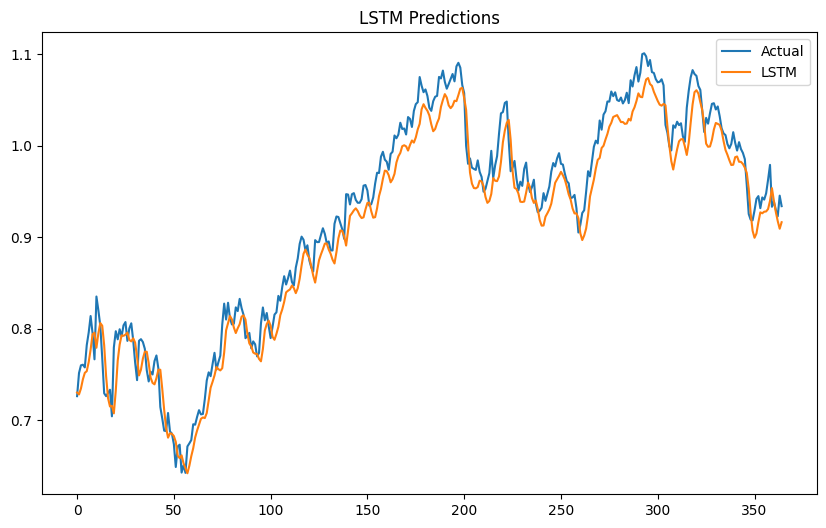

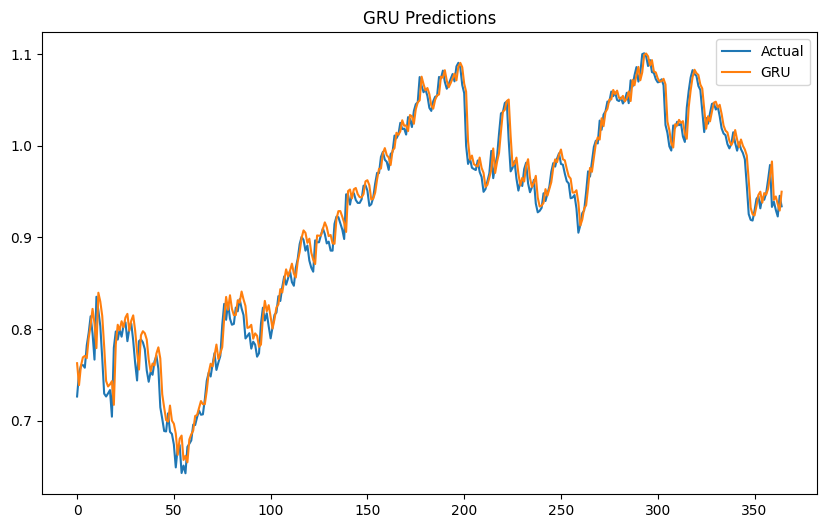

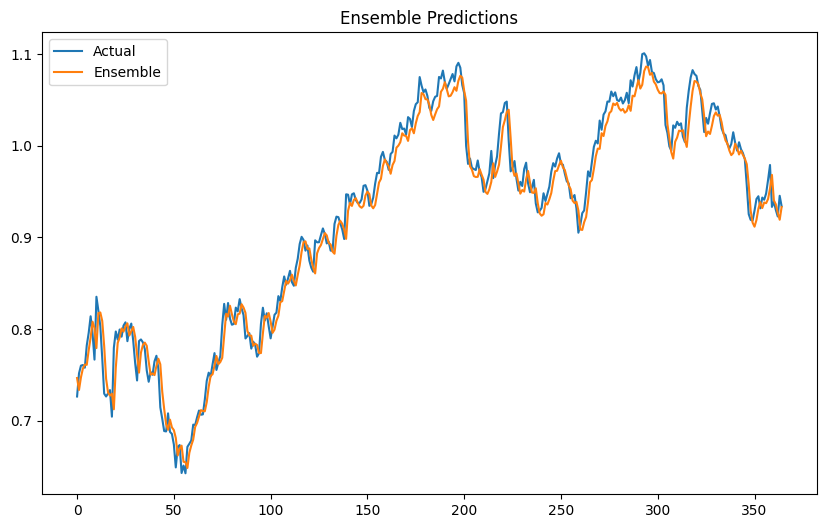

In [ ]:
# Plot LSTM predictions
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(lstm_predictions, label='LSTM')
plt.legend()
plt.title('LSTM Predictions')
plt.show()

# Plot GRU predictions
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(gru_predictions, label='GRU')
plt.legend()
plt.title('GRU Predictions')
plt.show()

# Plot ensemble predictions
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(ensemble_predictions, label='Ensemble')
plt.legend()
plt.title('Ensemble Predictions')
plt.show()

In [ ]:
# Reshape predictions to 1D arrays
y_test_flat = y_test.flatten()
lstm_predictions_flat = lstm_predictions.flatten()
gru_predictions_flat = gru_predictions.flatten()
ensemble_predictions_flat = ensemble_predictions.flatten()

# Create a DataFrame to store the actual and predicted values
df1 = pd.DataFrame({'Actual': y_test_flat, 'LSTM': lstm_predictions_flat, 'GRU': gru_predictions_flat, 'Ensemble': ensemble_predictions_flat})

# Print the DataFrame
print(df1.head(20))


      Actual      LSTM       GRU  Ensemble
0   0.726329  0.730326  0.762682  0.746504
1   0.751607  0.728217  0.738703  0.733460
2   0.760013  0.734678  0.759840  0.747259
3   0.760703  0.744713  0.769062  0.756888
4   0.757754  0.751810  0.770637  0.761224
5   0.782092  0.753631  0.768164  0.760898
6   0.795766  0.763506  0.790094  0.776800
7   0.813894  0.777283  0.804240  0.790761
8   0.795139  0.793997  0.822007  0.808002
9   0.766599  0.795651  0.806189  0.800920
10  0.835220  0.779216  0.779149  0.779183
11  0.820166  0.794991  0.839611  0.817301
12  0.803293  0.806221  0.829957  0.818089
13  0.768041  0.803315  0.814306  0.808811
14  0.729465  0.781995  0.780902  0.781448
15  0.726329  0.748072  0.743312  0.745692
16  0.729716  0.724217  0.737276  0.730747
17  0.733354  0.715015  0.739563  0.727289
18  0.704312  0.715795  0.743059  0.729427
19  0.779583  0.707516  0.717213  0.712364
